Exercises and code samples for the course **Unsupervised and Reinforcement Learning (AAI-URL)** in the Bachelor of AAI at Rosenheim University of Applied Sciences.

# Elbow Method

First, let's add some imports

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

Prepare the test dataset:

In [13]:
# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2)))
print(X)


[[3 5]
 [1 4]
 [1 5]
 [2 6]
 [1 5]
 [6 8]
 [6 6]
 [6 7]
 [5 6]
 [6 7]
 [7 1]
 [8 2]
 [9 1]
 [8 2]
 [9 3]
 [9 2]
 [8 3]]


Just visualize it using matplotlib:

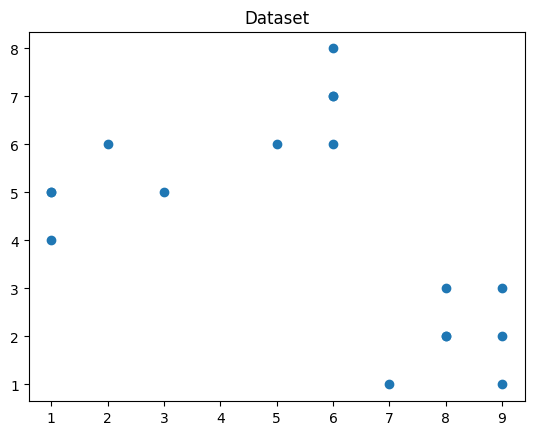

In [40]:
# Visualizing the data
plt.title('Dataset')
plt.scatter(X[:,0], X[:,1])
#plt.plot()
plt.show()

Try to get distortion correct:

In [41]:
def distortion(X, centroids):
    
    dist = {}
    
    for i in range(len(centroids)):
        dist[i] = []
            
    centeroids = np.argmin(cdist(X, centroids, 'euclidean'), axis=1)
    values  = np.min(cdist(X, centroids, 'euclidean'), axis=1)

    for index, center in enumerate(centeroids):
        dist[center].append(values[index])

    r = sum([sum(dist[x])/len(dist[x]) for x in dist])
    return r

Run kmeans over various ks (here 2 to  10) and collect the measures:

In [47]:
distortions = []
inertias    = []
silhoutte   = []

K = range(2, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    cluster_labels= kmeanModel.fit_predict(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #distortions.append(distortion(X, kmeanModel.cluster_centers_))
    inertias.append(kmeanModel.inertia_)
    silhoutte.append(metrics.silhouette_score(X, cluster_labels , metric = 'euclidean'))

/Users/tima268/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tima268/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tima268/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tima268/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of

Print distortions:

In [46]:
for val in distortions:
    print(val)

1.7687413573405673
0.8819889697423957
0.7587138847606585
0.7004644881908968
0.6178235133263348
0.5093717077076824
0.42618267462691206
0.3333333333333333


Plot distortions over k:

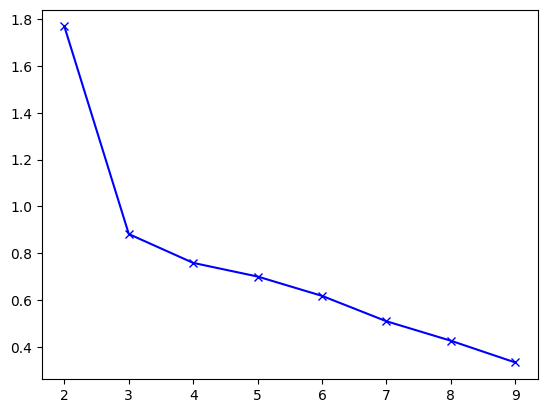

In [44]:
plt.plot(K, distortions, 'bx-')

plt.show()

Plot inertias over k:

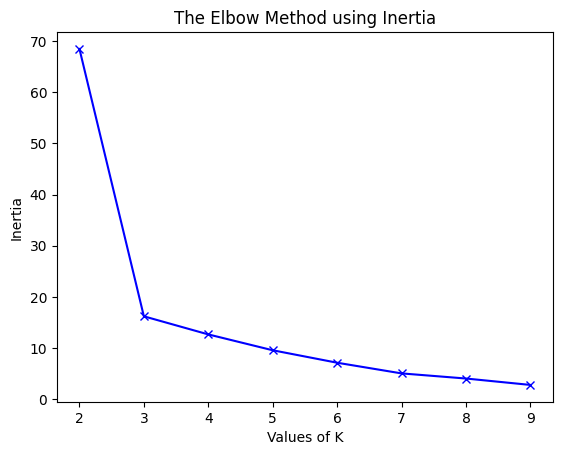

In [19]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# Silhouette scores

In [20]:
print(silhoutte)

[0.6113424368705715, 0.7122079383287169, 0.6389948643127632, 0.46983374375750137, 0.4159974962395202, 0.3889390504750796, 0.35284612510104646, 0.39932610787930767]


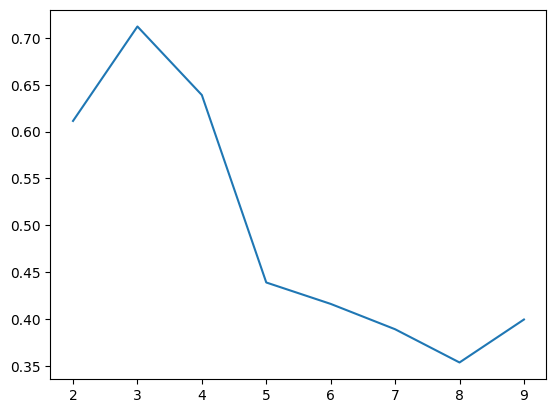

1

In [48]:
plt.plot(K,silhoutte)
plt.show()

np.argmax(silhoutte)

/Users/tima268/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tima268/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tima268/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tima268/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of

For k = 2  silhouette_score is : 0.6113424368705715
For k = 3  silhouette_score is : 0.7122079383287169
For k = 4  silhouette_score is : 0.5430468177734551
For k = 5  silhouette_score is : 0.46983374375750137


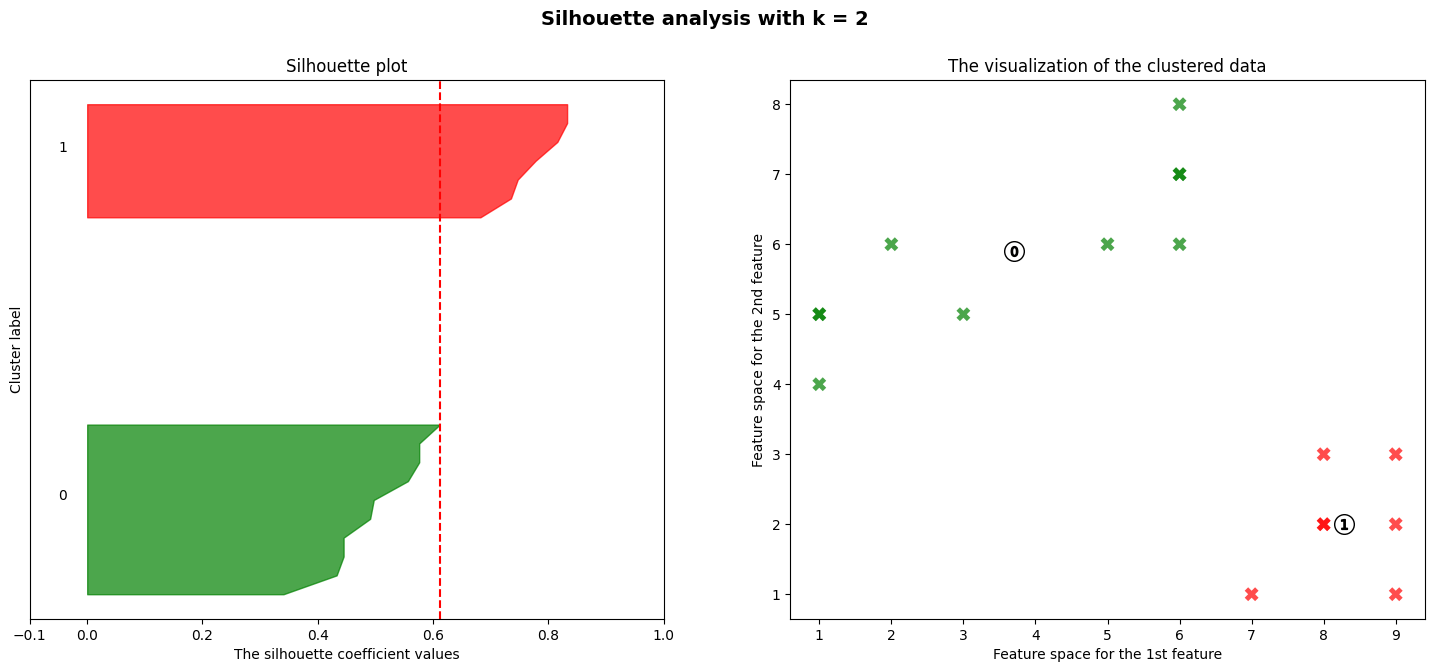

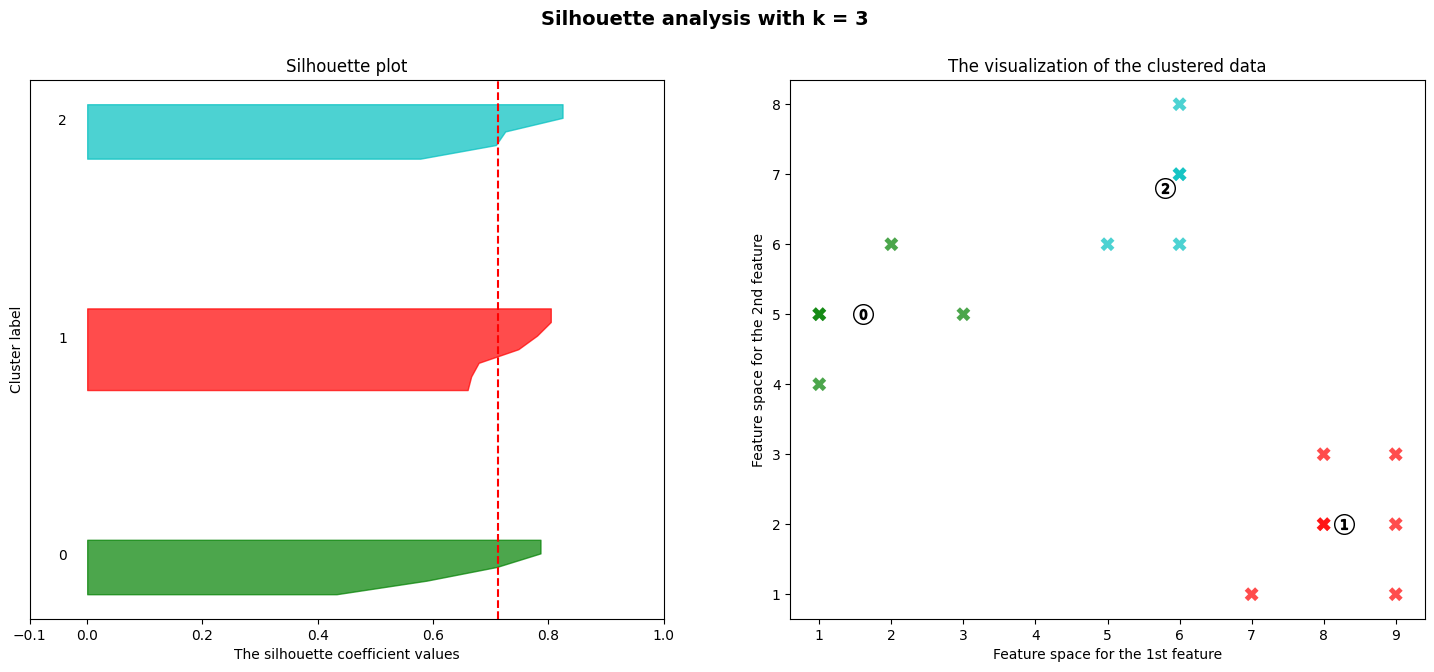

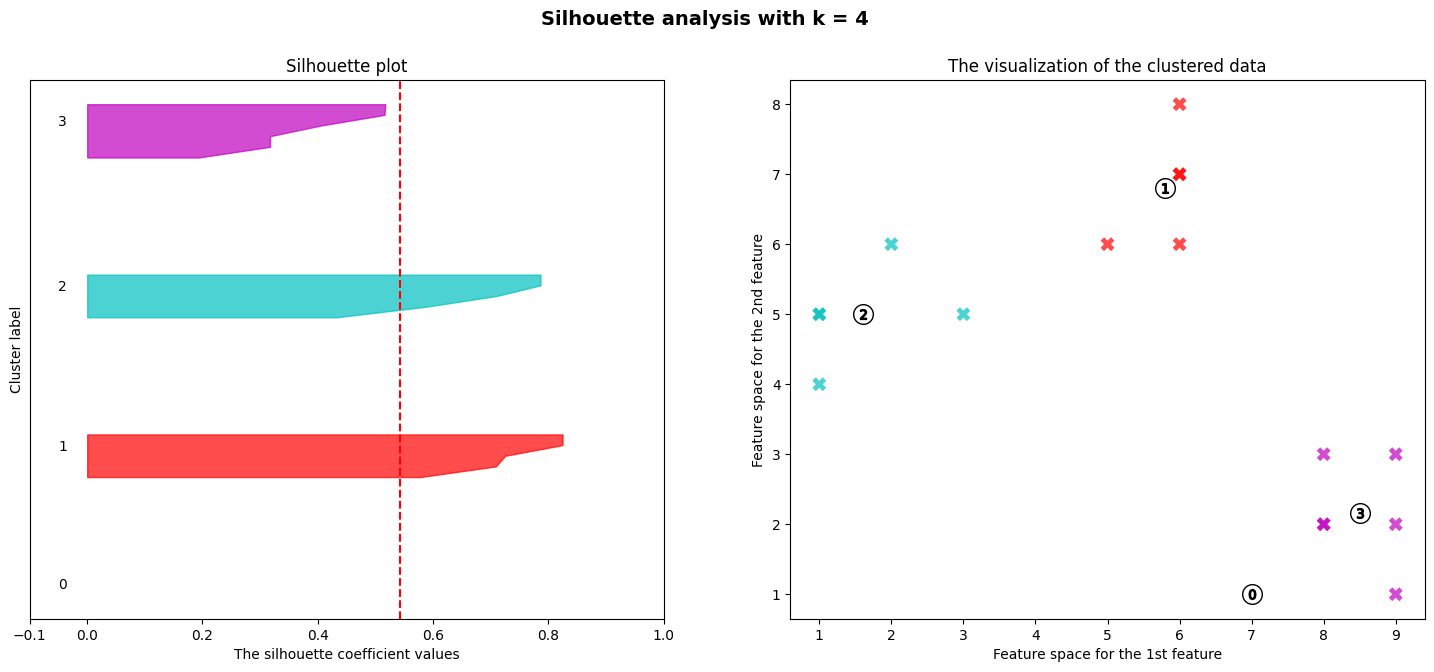

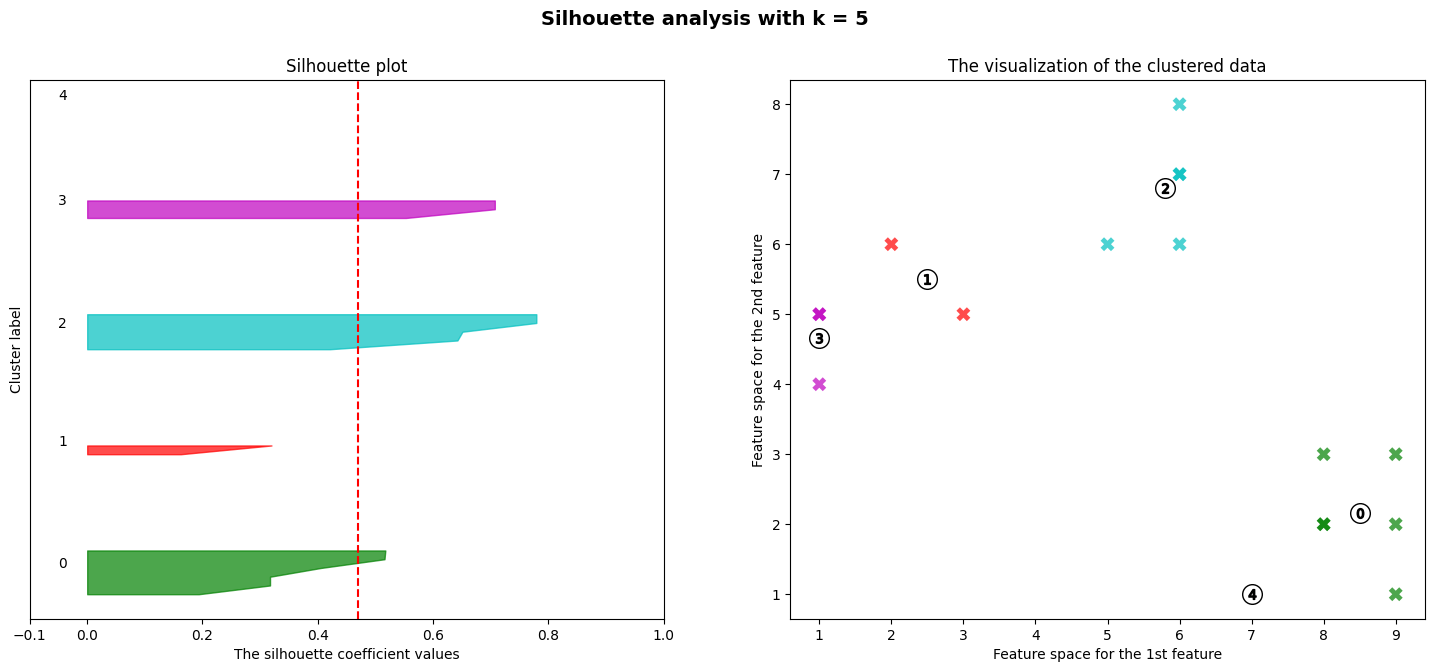

In [22]:
colors = 10*["g","r","c","m","b"]

for k in range(2,6):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette = metrics.silhouette_score(X, cluster_labels)
    print("For k =", k," silhouette_score is :", silhouette)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = colors[i]
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    cm = [colors[i] for i in cluster_labels.astype(int)]
    # 2nd Plot showing the actual clusters formed
    ax2.scatter( X[:, 0], X[:, 1], marker="X", s=100, lw=0, alpha=0.7, c=cm, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter( centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette analysis with k = %s" %k, fontsize=14, fontweight="bold")

plt.show()

In [37]:
A=[[i,i] for i in range(10)]

B=[x for x in A]
C=list(zip(A,B))

D= [x+y for x,y in C]

print(A)
print(B)
print(C)
print(D)

[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9]]
[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9]]
[([0, 0], [0, 0]), ([1, 1], [1, 1]), ([2, 2], [2, 2]), ([3, 3], [3, 3]), ([4, 4], [4, 4]), ([5, 5], [5, 5]), ([6, 6], [6, 6]), ([7, 7], [7, 7]), ([8, 8], [8, 8]), ([9, 9], [9, 9])]
[[0, 0, 0, 0], [1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4], [5, 5, 5, 5], [6, 6, 6, 6], [7, 7, 7, 7], [8, 8, 8, 8], [9, 9, 9, 9]]
